> **提示**：
> 1. 欢迎来到**Python 人工智能入门**毕业项目！引用段会添加这类提示，来帮助你理清整个项目的思路。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。
> 2. 在这个项目模板中，会在具体内容后的小括号 *()* 中或其他地方添加一部分提示，请在最终项目提交前，删除括号及里面的提示，保持报告的整洁。
> 3. 请先通读整个文档，理清思路后再着手解答
> 4. Have fun!


---
# Python 人工智能入门 毕业项目
# 为某集团打造用户分层模型
## 赵阳
## 2019年11月1日
---


## 目录
<ul>
<li><a href="#definition">定义</a></li>
<li><a href="#analysis">分析</a></li>
<li><a href="#implementation">实现</a></li>
<li><a href="#result">结果</a></li>
<li><a href="#conclusion">结论</a></li>   
</ul>



---
<a id="definition"></a>
## Ⅰ.定义

在第一节中，你需要对你选定的问题作出定义

### 1.项目概况

在这个部分，你需要用浅显简洁的语句描述这个项目的一个总体概况。以下几个问题可以帮助你理清思路：

- _项目的背景信息是什么？_ 
- _做这个项目的出发点？_ 
- _数据集的大概情况是什么？_ 

### 2.问题陈述

在这个部分，你需要清楚地为你将要解决的问题下定义，这应该包括你解决问题将要使用的策略（任务的大纲）。你同时要详尽地讨论你期望的结果是怎样的。有几个问题是需要考虑的：
- _你是否清楚地定义了这个问题。站在读者的角度，他们能否明白你将要解决的问题是什么。_ 
- _你是否详尽地阐述了你将会如何解决这个问题？_ 
- _你期望什么样的结果，读者能明白你期望的这个结果吗？_ 

### 3.评价指标
在这里，你需要说明你将要用于评价自己的模型和结果的**指标**和**计算方法**。它们需要契合你所选问题的特点及其所在的领域，同时，你要保证他们的合理性。需要考虑的问题：
- _你是否清晰地定义了你所使用的指标和计算方法？_
- _你是否论述了这些指标和计算方法的合理性？_

对任何一个公司来说，吸引新客户固然重要，但是更为重要的是留住老客户。可是，某集团通过数据调研发现每个月的用户流失量很大，而且受制于有限的人力资源，无法对每一位用户进行策略性挽回。因此，需要对用户进行分层，并通过预测提前筛选出最可能流失的用户，从而施行点对点的挽回策略。

希望通过这个项目，将“Python 人工智能入门”这门课上学到的知识应用于实践，以加深理解。该数据集来自于kaggle，权威性强，而且结构较为简单，不需要很多相关业务知识也能理解。还有，数据集对每条数据给出了分类标签“Churn”，不需要对数据集进行分类。本人认为这些特点有利于初学者将主要精力放在对“应用统计与机器学习入门”知识本身的理解上。数据集中的各列没有空值，各行也没有重复值。在各列中，有三个列为数值型数据：SeniorCitizen，tenure，MonthlyCharges。还有一列的数据为字符串，但是很明显这一列应该转成数值型：TotalCharges。其他列为字符串，是分类型数据。

客户选择“用脚投票”有多种原因。有些时候，顾客的离去取决于一些随机因素，如居住地变更、手机丢失、甚至死亡。但是总体来说，客户的流失是和公司提供的服务以及客户的特征密切相关的。本文的目的是通过研究用户流失这一行为同一些非随机因素之间的关系，建立模型，以便提前识别可能离去的客户，进而采取必要的挽留措施。本文首先对原始数据进行整理，然后执行探索性数据分析，识别出数据之间的关系，之后建立模型描述这种关系。本文最终的目的是建立一个模型，可以通过预测很好的提前筛选出最可能流失的用户。

对于模型的评价，首先采用R<sup>2</sup>评估拟合的效果。当然，这个方法在模型拟合中存在误导性，如果我们只在同一个数据集上进行验证，无论我们向模型中添加什么变量，都会改善模型，也就是说R<sup>2</sup>值会上升。因此，通过在交叉验证切分数据集，以确保模型能够通用化。因为模型的目的是对用户进行分类，所以采用逻辑回归建立模型。通常情况下，可以为逻辑回归的预测结果建立混淆矩阵，从而得到precision、 recall 与 accuracy等常见的度量标准。 

R<sup>2</sup> = $\frac{Total Variation}{Explained Variation}$

召回率：recall，真实结果为真，而且准备识别的概率。
$\frac{True Positive}{ True Positive+ FalseNegative}$

准确率：precision，检测到为真，而且真实结果也为真的概率。
$\frac{True Positive}{ True Positive+ FalsePositive}$

精确率：accuracy，分类器正确分类的样本数与总样本数之比。
$\frac{True Positive}{sample}$

---
<a id="analysis"></a>
## Ⅱ.分析

在第二节，你将对数据进行分析与整理，来进一步认识数据。

### 1.数据的探索
在这一部分，你需要探索你将要使用的数据。数据可以是若干个数据集，或者输入数据/文件，甚至可以是一个设定环境。不过在本项目中，我们已经给出了数据集，因此，你需要详尽地描述数据的类型。如果可以的话，你需要展示数据的一些统计量和基本信息（例如输入的特征（features)，输入里与定义相关的特性）。你还要说明数据中的任何需要被关注的异常或有趣的性质（例如需要做变换的特征，离群值等等）。你需要考虑：
- _如果你使用了数据集，你要详尽地讨论了你所使用数据集的某些特征，并且为阅读者呈现一个直观的样本_ 
- _如果你使用了数据集，你要计算并描述了它们的统计量，并对其中与你问题相关的地方进行讨论_ 
- _数据集或输入中是否存在异常、缺陷或其他特性？你为什么认为他们是异常？给出佐证你观点的理由(例如分类变量的处理，缺失数据，离群值等）_

### 2.探索性可视化
在这一部分，你需要对数据的特征或特性进行概括性或提取性的可视化。这个可视化的过程应该要适应你所使用的数据。就你为何使用这个形式的可视化，以及这个可视化过程为什么是有意义的，进行一定的讨论。你需要考虑的问题：
- _你是否对数据中与问题有关的特性进行了可视化？_
- _你对可视化结果进行详尽的分析和讨论了吗？_
- _绘图的坐标轴，标题，基准面是不是清晰定义了？_

### 3.算法和技术
在这一部分，你需要讨论你解决问题时用到的算法和技术。你需要根据问题的特性和所属领域来论述使用这些方法的合理性。你需要考虑：
- _你所使用的算法，包括用到的变量/参数都清晰地说明了吗？_
- _你是否已经详尽地描述并讨论了使用这些技术的合理性？_

> **提示**：*不应* 在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

In [3]:
# 请在这一代码框内编写在这部分你需要的程序
# 包括但不限于
# * 导入数据
# * 对数据的整理、总结
# * 绘制可以表达你想法的图像
# 你可以自由的使用任意数量和任意格式的代码框，但请在最终提交的报告中注意报告的整洁与通顺
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt
%matplotlib inline
np.random.seed(42)
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 描述统计量
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# 数据集的形状
df.shape
# 数据集共有7043条数据，21个属性列

(7043, 21)

In [6]:
# 数据类型
df.info()
# 在各列中，有三个列为数值型数据：SeniorCitizen，tenure，MonthlyCharges。
# 还有一列的数据为字符串，但是很明显这一列应该转成数值型：TotalCharges。其他列为字符串，是分类型数据。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
# 但是不能直接将TotalCharges从字符串转为数字类型，因为有的行该列为空。对数据集进行整理，删除该列为空的行。
mask = df['TotalCharges'] == ' '
df[mask]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
mask = df['TotalCharges'].isna()
df[mask]
df.dropna(inplace=True)

In [8]:
# 数据集中的各列没有空值，各行也没有重复值。
df.isna().sum()
sum(df.duplicated())

0

In [9]:
# 描述统计量
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

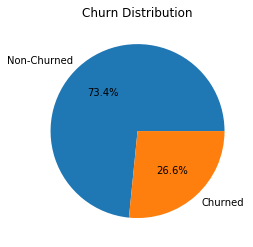

In [11]:
# 客户流失量的分布
plt.pie(df['Churn'].value_counts(), labels=['Non-Churned','Churned'], autopct='%1.1f%%');
plt.title('Churn Distribution');

In [12]:
# define func for pie
# attr: 属性名，函数为该属性创建饼图
# labels：饼图中各个楔形的标签，如果不填，默认以dataframe[label].unique()作为标签。
# dataframe：数据
def draw_pie(attr, labels=None, dataframe = df):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    axs[0].pie(dataframe.query("Churn=='Yes'")[attr].value_counts().sort_index(), autopct='%1.1f%%');
    axs[0].set_title('Churned')
    axs[1].pie(dataframe.query("Churn=='No'")[attr].value_counts().sort_index(), autopct='%1.1f%%');
    axs[1].set_title('Non-Churned')
    fig.suptitle(attr + ' dist in Churned Customer and Non-Churned Customer')
    if labels:
        fig.legend(labels=labels);
    else:
        labels = np.sort(df[attr].unique());
        fig.legend(labels = labels);

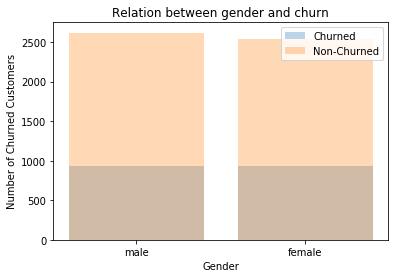

In [25]:
# 客户性别和客户流失之间的关系
plt.bar(['male','female'],df.query("Churn=='Yes'")['gender'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(['male','female'],df.query("Churn=='No'")['gender'].value_counts(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.title('Relation between gender and churn');
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers');

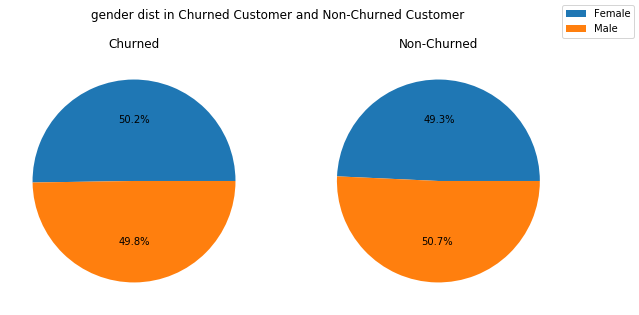

In [12]:
# 在流失的客户中，女性和男性的比重相仿。
draw_pie('gender', dataframe=df)

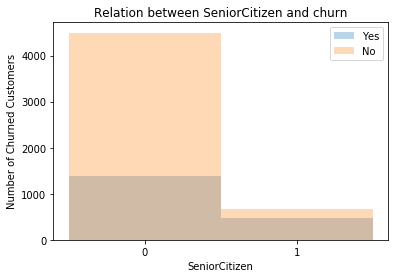

In [26]:
# 客户年龄和客户流失之间的关系
plt.hist(df.query("Churn=='Yes'")['SeniorCitizen'], alpha = 0.3, label = 'Yes',bins=2,range=[-0.5,1.5]);
plt.hist(df.query("Churn=='No'")['SeniorCitizen'], alpha = 0.3, label = 'No',bins=2,range=[-0.5,1.5]);
plt.legend();
tick_locs = [0,1]
plt.xticks(tick_locs, tick_locs);
plt.title('Relation between SeniorCitizen and churn');
plt.xlabel('SeniorCitizen')
plt.ylabel('Number of Churned Customers');

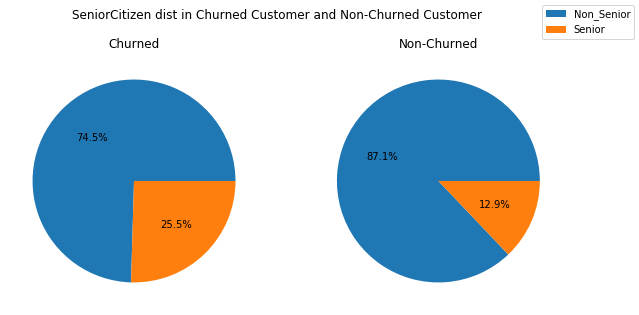

In [14]:
# 较之于留下的客户，流失的客户中，老年人的比重较大。
draw_pie('SeniorCitizen',labels=['Non_Senior','Senior'])

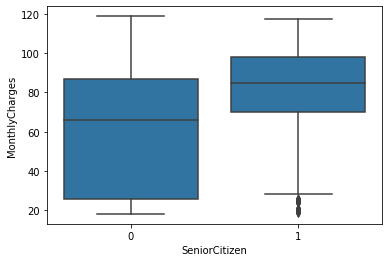

In [27]:
# 年龄稍长的客户月消费普遍较高
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'SeniorCitizen', y = 'MonthlyCharges', color = base_color);

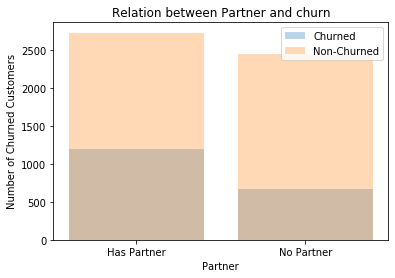

In [28]:
# 客户是否有Partner和客户流失之间的关系
plt.bar(['Has Partner','No Partner'],df.query("Churn=='Yes'")['Partner'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(['Has Partner','No Partner'],df.query("Churn=='No'")['Partner'].value_counts(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.title('Relation between Partner and churn');
plt.xlabel('Partner')
plt.ylabel('Number of Churned Customers');

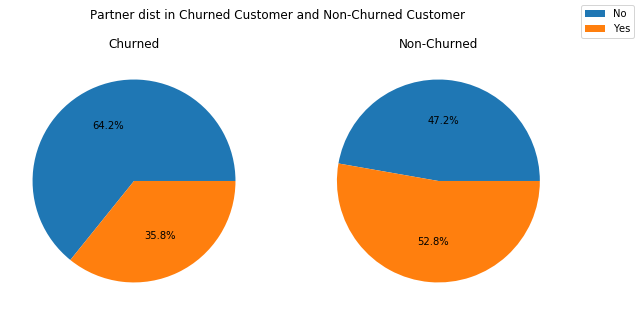

In [29]:
# 较之于留下的客户，流失的客户中，没有Partner的客户比重较大。
draw_pie('Partner')

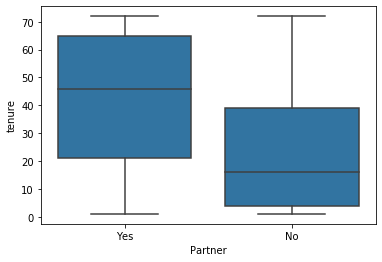

In [30]:
# 有partner的用户订阅服务较长
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'Partner', y = 'tenure', color = base_color);

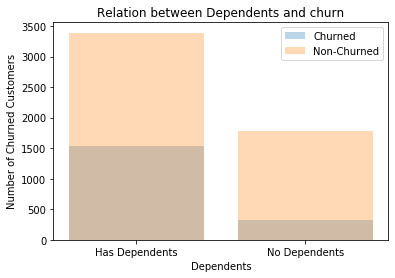

In [31]:
# 客户是否有Dependents和客户流失之间的关系
plt.bar(['Has Dependents','No Dependents'],df.query("Churn=='Yes'")['Dependents'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(['Has Dependents','No Dependents'],df.query("Churn=='No'")['Dependents'].value_counts(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.title('Relation between Dependents and churn');
plt.xlabel('Dependents')
plt.ylabel('Number of Churned Customers');

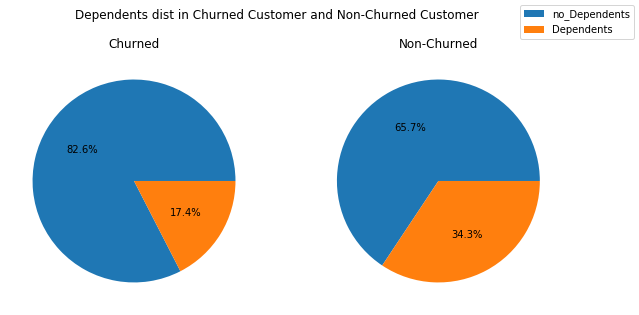

In [32]:
# 较之于留下的客户，流失的客户中，没有Dependents的客户比重较大。
draw_pie('Dependents',['no_Dependents','Dependents'])

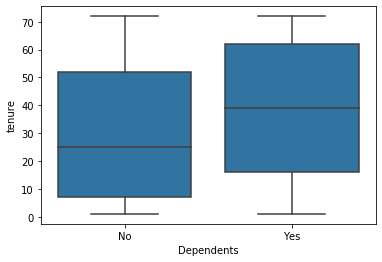

In [33]:
# 有Dependents的用户订阅服务较长
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'Dependents', y = 'tenure', color = base_color);

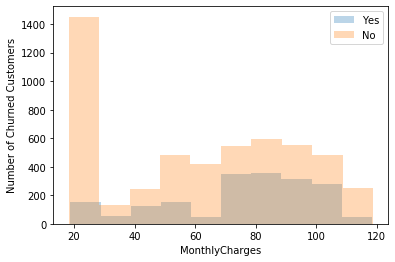

In [34]:
# 客户使用公司服务的月数和客户流失之间的关系
plt.hist(df.query("Churn=='Yes'")['MonthlyCharges'], alpha = 0.3, label = 'Yes');
plt.hist(df.query("Churn=='No'")['MonthlyCharges'], alpha = 0.3, label = 'No');
plt.legend();
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Churned Customers');

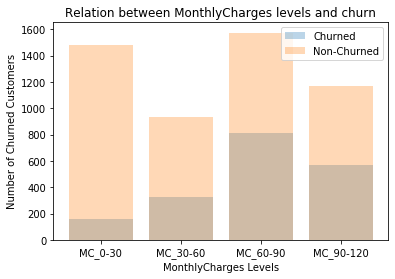

In [35]:
# MonthlyCharges 的取值从18.25到118.75。
# 根据MonthlyCharges新建分类变量
bin_edges = [0, 30, 60, 90, 120]
bin_names = ['MC_0-30','MC_30-60','MC_60-90','MC_90-120']
df['MC_levels'] = pd.cut(df['MonthlyCharges'], bin_edges, labels=bin_names)
plt.bar(df['MC_levels'].unique(),df.query("Churn=='Yes'")['MC_levels'].value_counts().sort_index(), alpha = 0.3,label = 'Churned')
plt.bar(df['MC_levels'].unique(),df.query("Churn=='No'")['MC_levels'].value_counts().sort_index(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.title('Relation between MonthlyCharges levels and churn');
plt.xlabel('MonthlyCharges Levels')
plt.ylabel('Number of Churned Customers');

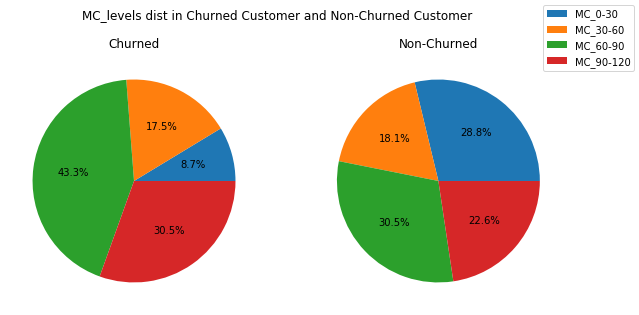

In [36]:
# 留下的客户和流失的客户中，MonthlyCharges的分布情况是不同的。在流失的客户中，月消费60-90的客户比重最大，其次为90-120。
draw_pie('MC_levels')

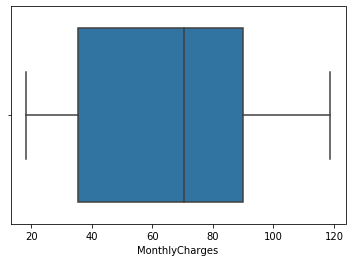

In [20]:
# 月消费额没有异常值
sb.boxplot(x = df['MonthlyCharges'], data=df);

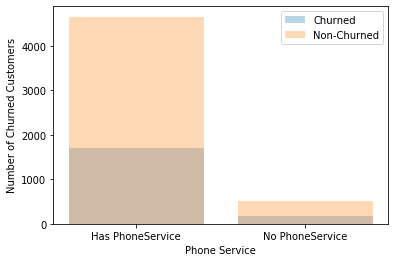

In [37]:
# 客户是否有PhoneService和客户流失之间的关系
plt.bar(['Has PhoneService','No PhoneService'],df.query("Churn=='Yes'")['PhoneService'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(['Has PhoneService','No PhoneService'],df.query("Churn=='No'")['PhoneService'].value_counts(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.xlabel('Phone Service')
plt.ylabel('Number of Churned Customers');

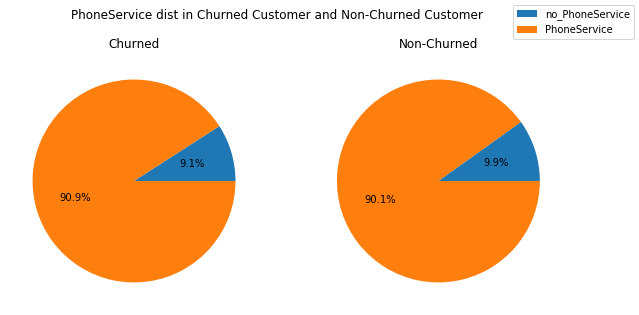

In [22]:
# 留下的客户和流失的客户中，有PhoneService的客户比重相仿。
draw_pie('PhoneService',labels = ['no_PhoneService','PhoneService'])

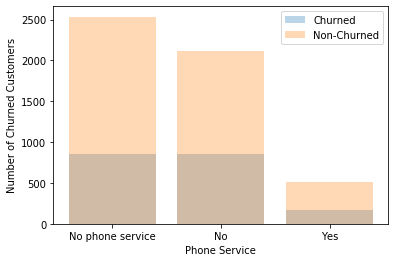

In [24]:
# 客户的MultipleLines服务和客户流失之间的关系
plt.bar(df['MultipleLines'].unique(),df.query("Churn=='Yes'")['MultipleLines'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['MultipleLines'].unique(),df.query("Churn=='No'")['MultipleLines'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Phone Service')
plt.ylabel('Number of Churned Customers');

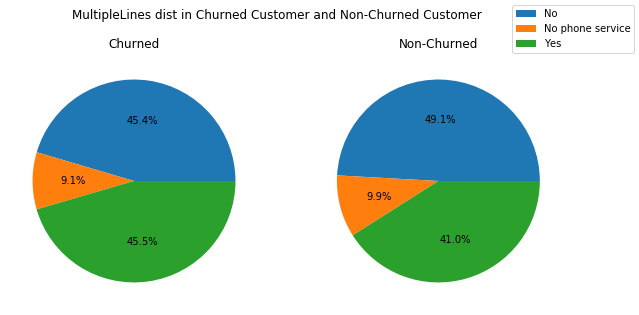

In [29]:
# 留下的客户和流失的客户中，有/无MultipleLines，和没有phone service的客户比重相仿。
draw_pie('MultipleLines')

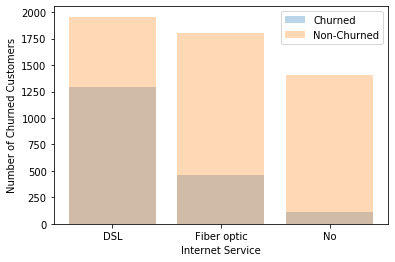

In [38]:
# 客户的InternetService服务和客户流失之间的关系
plt.bar(df['InternetService'].unique(),df.query("Churn=='Yes'")['InternetService'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['InternetService'].unique(),df.query("Churn=='No'")['InternetService'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Internet Service')
plt.ylabel('Number of Churned Customers');

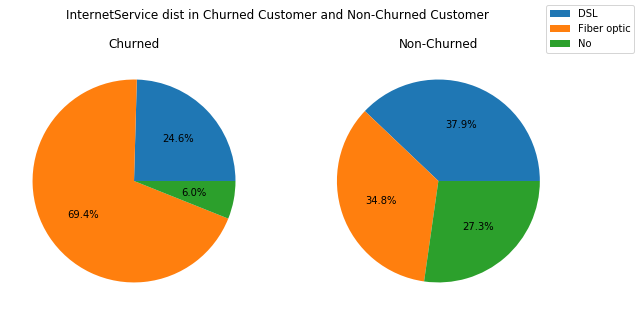

In [31]:
# 留下的客户和流失的客户中，InternetService的分布情况是不同的。
draw_pie('InternetService')

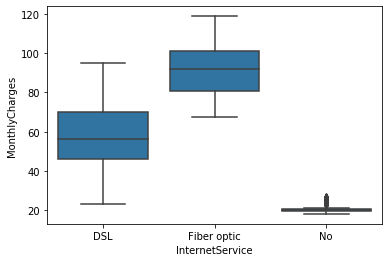

In [39]:
# Fiber optic的月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'InternetService', y = 'MonthlyCharges', color = base_color);

In [40]:
# 客户的一些服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
def changeNoInternetServiceToNo(x):
    if x == 'Yes':
        return x
    else:
        return 'No'

In [41]:
# 客户的OnlineSecurity服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
df['OnlineSecurity'] = df['OnlineSecurity'].apply(changeNoInternetServiceToNo)

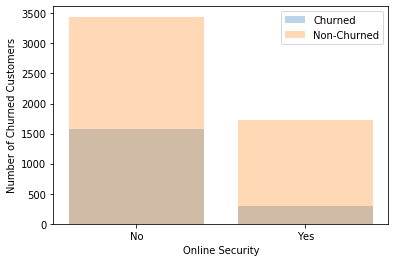

In [43]:
# 客户的OnlineSecurity服务和客户流失之间的关系
plt.bar(df['OnlineSecurity'].unique(),df.query("Churn=='Yes'")['OnlineSecurity'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['OnlineSecurity'].unique(),df.query("Churn=='No'")['OnlineSecurity'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Online Security')
plt.ylabel('Number of Churned Customers');

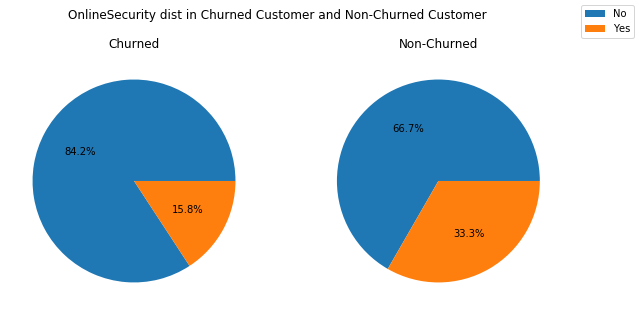

In [36]:
# 较之于留下的客户，流失的客户中，没有OnlineSecurity的客户占比重较大。
draw_pie('OnlineSecurity')

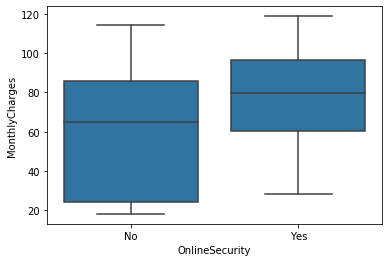

In [44]:
# 有OnlineSecurity的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'OnlineSecurity', y = 'MonthlyCharges', color = base_color);

In [45]:
# 客户的OnlineBackup服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
df['OnlineBackup'] = df['OnlineBackup'].apply(changeNoInternetServiceToNo)

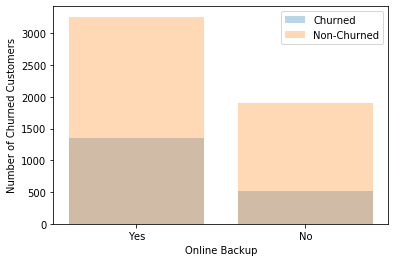

In [46]:
# 客户的OnlineBackup服务和客户流失之间的关系
plt.bar(df['OnlineBackup'].unique(),df.query("Churn=='Yes'")['OnlineBackup'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['OnlineBackup'].unique(),df.query("Churn=='No'")['OnlineBackup'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Online Backup')
plt.ylabel('Number of Churned Customers');

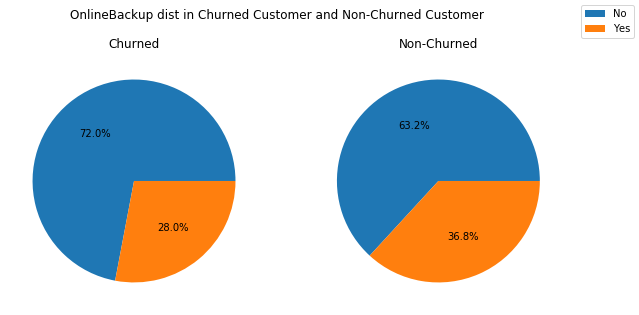

In [40]:
# 较之于留下的客户，流失的客户中，没有OnlineBackup的客户占比重较大。
draw_pie('OnlineBackup')

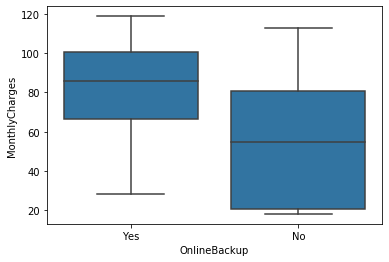

In [47]:
# 有OnlineBackup的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'OnlineBackup', y = 'MonthlyCharges', color = base_color);

In [48]:
# 客户的DeviceProtection服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
df['DeviceProtection'] = df['DeviceProtection'].apply(changeNoInternetServiceToNo)

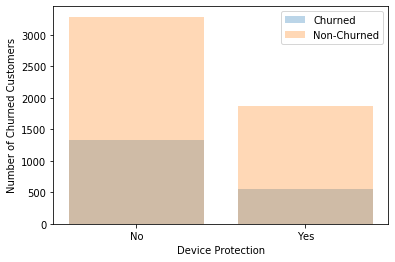

In [49]:
# 客户的DeviceProtection服务和客户流失之间的关系
plt.bar(df['DeviceProtection'].unique(),df.query("Churn=='Yes'")['DeviceProtection'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['DeviceProtection'].unique(),df.query("Churn=='No'")['DeviceProtection'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Device Protection')
plt.ylabel('Number of Churned Customers');

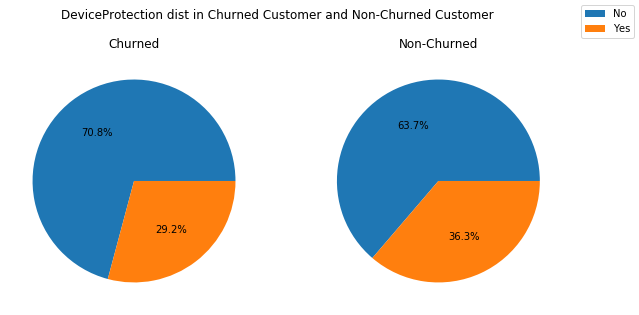

In [44]:
# 较之于留下的客户，流失的客户中，没有DeviceProtection的客户占比重较大。
draw_pie('DeviceProtection')

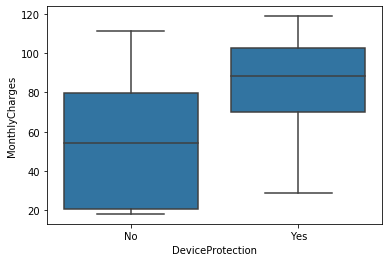

In [50]:
# 有DeviceProtection的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'DeviceProtection', y = 'MonthlyCharges', color = base_color);

In [51]:
# 客户的TechSupport服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
df['TechSupport'] = df['TechSupport'].apply(changeNoInternetServiceToNo)

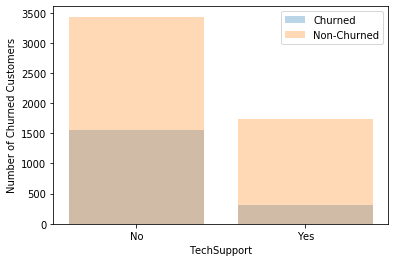

In [52]:
# 客户的TechSupport服务和客户流失之间的关系
plt.bar(df['TechSupport'].unique(),df.query("Churn=='Yes'")['TechSupport'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['TechSupport'].unique(),df.query("Churn=='No'")['TechSupport'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('TechSupport')
plt.ylabel('Number of Churned Customers');

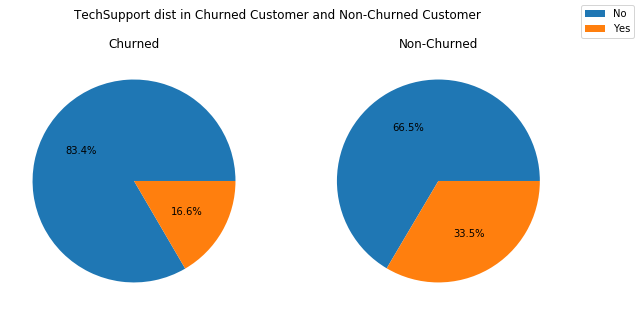

In [48]:
# 较之于留下的客户，流失的客户中，没有TechSupport的客户占比重较大。
draw_pie('TechSupport')

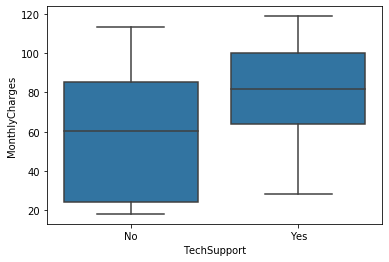

In [53]:
# 有TechSupport的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'TechSupport', y = 'MonthlyCharges', color = base_color);

In [54]:
# 客户的StreamingTV服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
df['StreamingTV'] = df['StreamingTV'].apply(changeNoInternetServiceToNo)

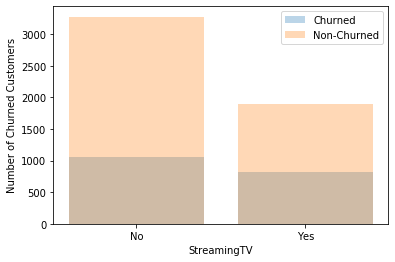

In [55]:
# 客户的StreamingTV服务和客户流失之间的关系
plt.bar(df['StreamingTV'].unique(),df.query("Churn=='Yes'")['StreamingTV'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['StreamingTV'].unique(),df.query("Churn=='No'")['StreamingTV'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('StreamingTV')
plt.ylabel('Number of Churned Customers');

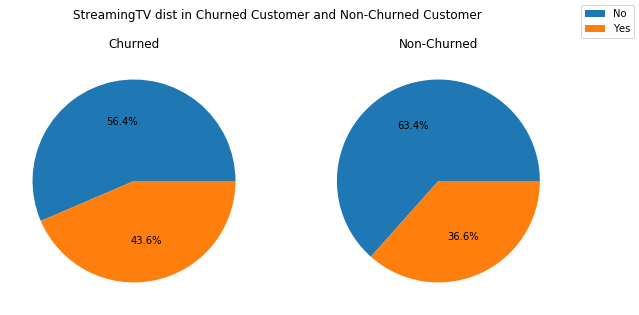

In [56]:
# 较之于留下的客户，流失的客户中，有StreamingTV的客户占比重较大。
draw_pie('StreamingTV')

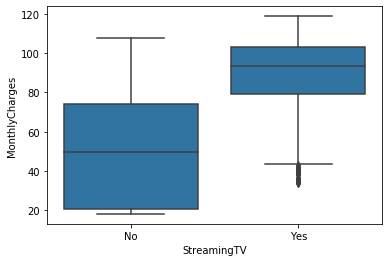

In [57]:
# 有StreamingTV的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'StreamingTV', y = 'MonthlyCharges', color = base_color);

In [58]:
# 客户的StreamingMovies服务有三种状态，1.yes, 2. no, 3. no internet service. 可以将2和3统一成一类。
df['StreamingMovies'] = df['StreamingMovies'].apply(changeNoInternetServiceToNo)

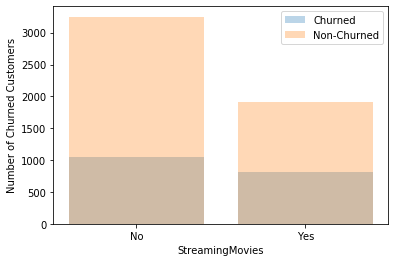

In [59]:
# 客户的StreamingMovies服务和客户流失之间的关系
plt.bar(df['StreamingMovies'].unique(),df.query("Churn=='Yes'")['StreamingMovies'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['StreamingMovies'].unique(),df.query("Churn=='No'")['StreamingMovies'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('StreamingMovies')
plt.ylabel('Number of Churned Customers');

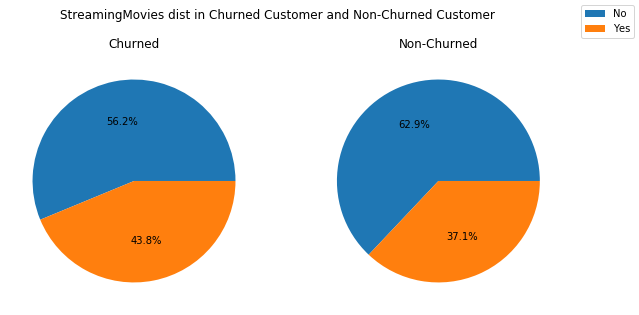

In [60]:
# 较之于留下的客户，流失的客户中，有StreamingMovies的客户占比重较大。
draw_pie('StreamingMovies')

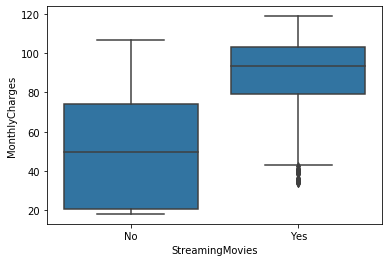

In [61]:
# 有StreamingMovies的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'StreamingMovies', y = 'MonthlyCharges', color = base_color);

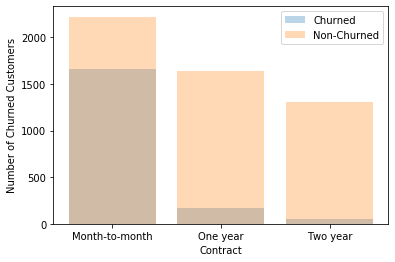

In [62]:
# 客户的合同年限和客户流失之间的关系
plt.bar(df['Contract'].unique(),df.query("Churn=='Yes'")['Contract'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['Contract'].unique(),df.query("Churn=='No'")['Contract'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Contract')
plt.ylabel('Number of Churned Customers');

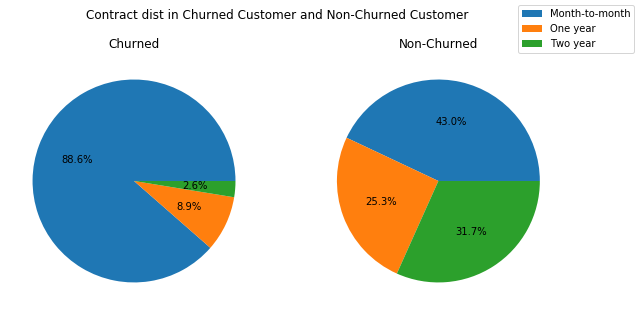

In [63]:
# 留下的客户和流失的客户中，Contract的分布情况是不同的。
draw_pie('Contract')

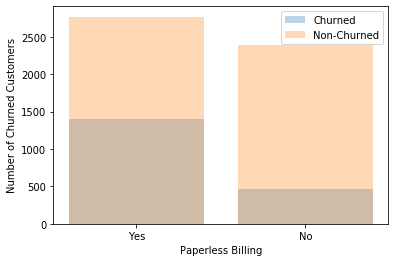

In [64]:
# 客户是否PaperlessBilling和客户流失之间的关系
plt.bar(df['PaperlessBilling'].unique(),df.query("Churn=='Yes'")['PaperlessBilling'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['PaperlessBilling'].unique(),df.query("Churn=='No'")['PaperlessBilling'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Paperless Billing')
plt.ylabel('Number of Churned Customers');

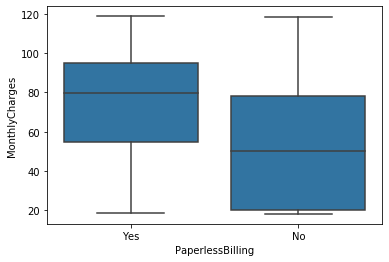

In [65]:
# 使用PaperlessBilling的客户月消费较高。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'PaperlessBilling', y = 'MonthlyCharges', color = base_color);

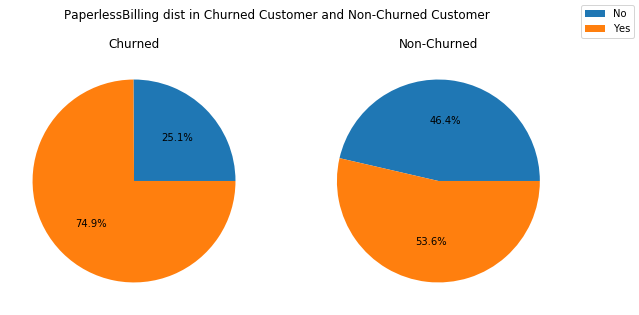

In [66]:
# 较之于留下的客户，流失的客户中，PaperlessBilling的客户占比重较大。
draw_pie('PaperlessBilling')

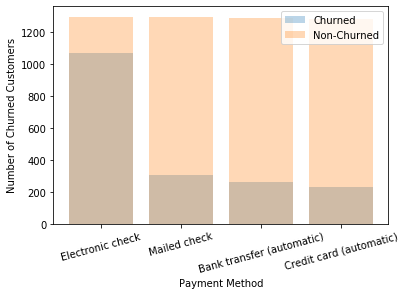

In [78]:
# 客户的支付方式和客户流失之间的关系
plt.bar(df['PaymentMethod'].unique(),df.query("Churn=='Yes'")['PaymentMethod'].value_counts(), alpha = 0.3,label = 'Churned')
plt.bar(df['PaymentMethod'].unique(),df.query("Churn=='No'")['PaymentMethod'].value_counts(), alpha = 0.3,label = 'Non-Churned')
plt.legend();
plt.xlabel('Payment Method')
plt.ylabel('Number of Churned Customers');
plt.xticks(rotation=15);

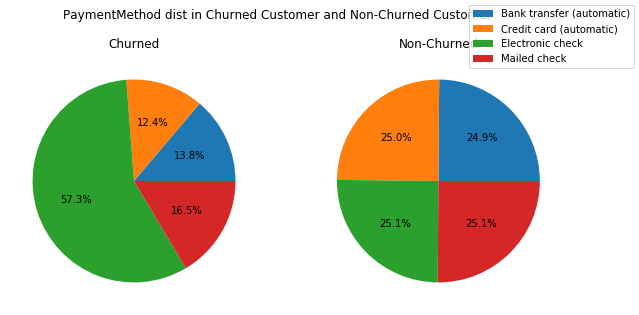

In [79]:
# 留下的客户和流失的客户中，PaymentMethod的分布情况是不同的。
draw_pie('PaymentMethod')

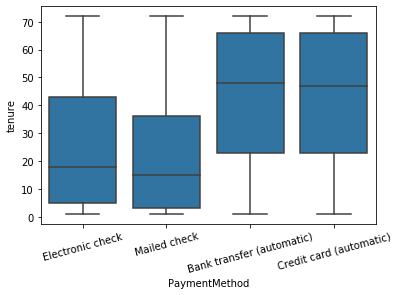

In [80]:
# 流失的客户中，以Electronic Check为支付方式的客户比重较大，而且以Electronic Check为支付方式的客户，订阅服务的时间较短。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'PaymentMethod', y = 'tenure',color = base_color);
plt.xticks(rotation=15);

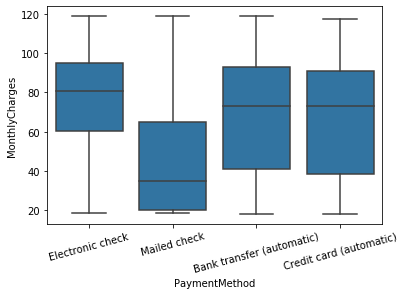

In [83]:
# 流失的客户中，以Electronic Check为支付方式的客户比重较大，而且以Electronic Check为支付方式的客户，订阅服务的时间较短。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'PaymentMethod', y = 'MonthlyCharges', color = base_color);
plt.xticks(rotation=15);

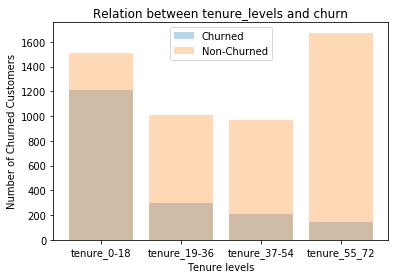

In [84]:
# tenure 的取值从1到72。
# 根据tenure新建分类变量
bin_edges = [0, 18, 36, 54, 72]
bin_names = ['tenure_0-18','tenure_19-36','tenure_37-54','tenure_55_72']
df['tenure_levels'] = pd.cut(df['tenure'], bin_edges, labels=bin_names)
plt.bar(df['tenure_levels'].unique(),df.query("Churn=='Yes'")['tenure_levels'].value_counts().sort_index(), alpha = 0.3,label = 'Churned')
plt.bar(df['tenure_levels'].unique(),df.query("Churn=='No'")['tenure_levels'].value_counts().sort_index(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.title('Relation between tenure_levels and churn');
plt.xlabel('Tenure levels')
plt.ylabel('Number of Churned Customers');

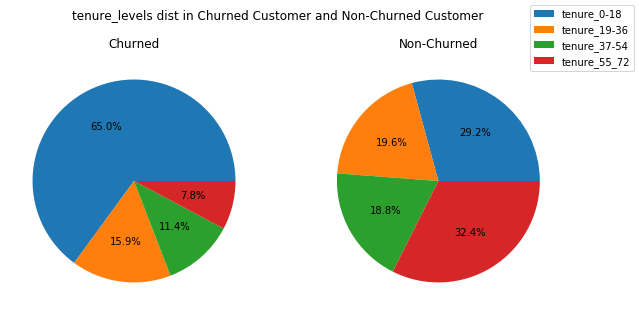

In [85]:
# 留下的客户和流失的客户中，tenure的分布情况是不同的。
draw_pie('tenure_levels')

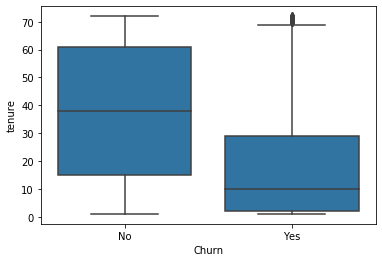

In [86]:
# 流失的客户订阅服务的时间普遍较短。
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'Churn', y = 'tenure', color = base_color);

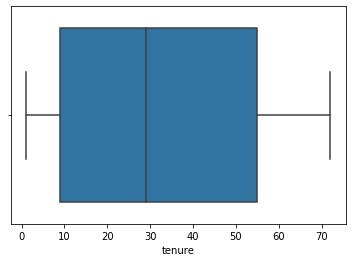

In [70]:
# 订购月数没有异常值
sb.boxplot(x = df['tenure'], data=df);

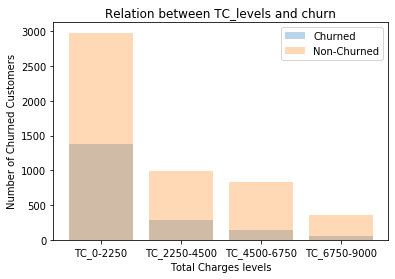

In [87]:
# TotalCharges 的取值从18.8到8684.8。
# 根据tenure新建分类变量
bin_edges = [0, 2250, 4500, 6750, 9000]
bin_names = ['TC_0-2250','TC_2250-4500','TC_4500-6750','TC_6750-9000']
df['TC_levels'] = pd.cut(df['TotalCharges'], bin_edges, labels=bin_names)
plt.bar(df['TC_levels'].unique(),df.query("Churn=='Yes'")['TC_levels'].value_counts().sort_index(), alpha = 0.3,label = 'Churned')
plt.bar(df['TC_levels'].unique(),df.query("Churn=='No'")['TC_levels'].value_counts().sort_index(), alpha = 0.3, label = 'Non-Churned')
plt.legend();
plt.title('Relation between TC_levels and churn');
plt.xlabel('Total Charges levels')
plt.ylabel('Number of Churned Customers');

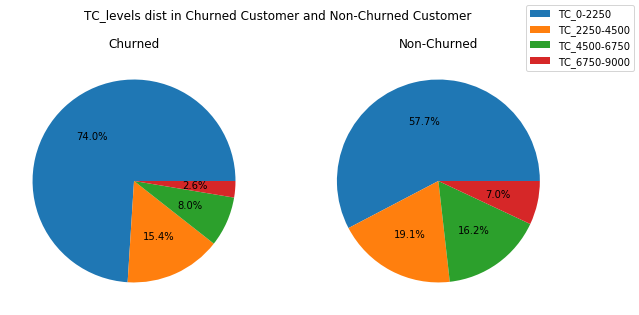

In [88]:
# 留下的客户和流失的客户中，TotalCharges的分布情况是不同的。
draw_pie('TC_levels')

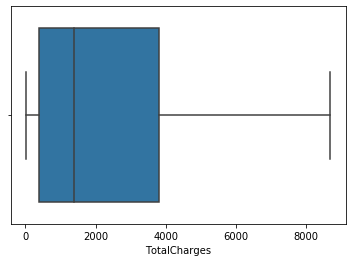

In [89]:
# 总消费额没有异常值
sb.boxplot(x = df['TotalCharges'], data=df);

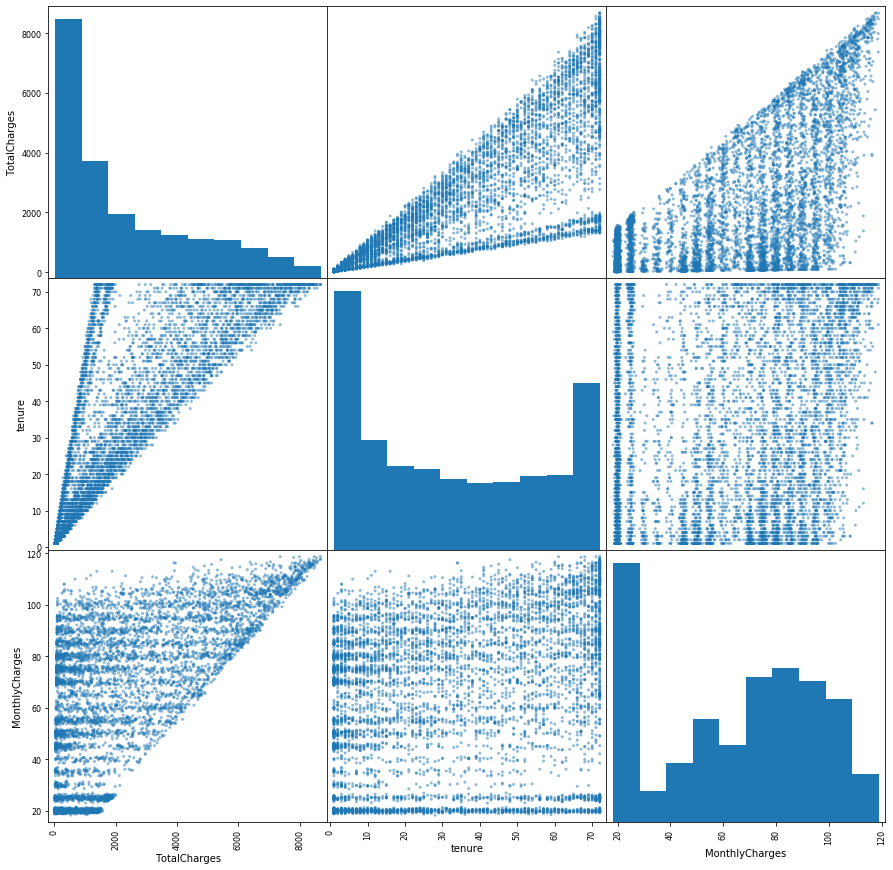

In [90]:
# 数值类型变量的散点图
pd.plotting.scatter_matrix(df[['TotalCharges','tenure','MonthlyCharges']], figsize=(15,15));

In [91]:
df['TotalCharges']/df['MonthlyCharges']

0        1.000000
1       33.178227
2        2.008357
3       43.516548
4        2.144979
5        8.233818
6       21.878788
7       10.147899
8       29.065363
9       62.118433
10      11.760761
11      17.245383
12      56.612855
13      48.566056
14      25.460190
15      69.714349
16      49.537530
17      69.186973
18       9.571558
19      20.687396
20       1.000000
21      10.214646
22       1.000000
23      58.515860
24      49.837248
25      27.678119
26      47.802214
27       1.000000
28      70.575623
29      16.894900
          ...    
7013    40.218415
7014    40.871637
7015    33.737676
7016     1.000000
7017    49.430993
7018     1.000000
7019    40.992556
7020    12.447917
7021    12.170569
7022    71.884707
7023    62.602899
7024    42.763561
7025    17.668595
7026     9.125566
7027    12.700068
7028    67.492200
7029     5.924550
7030     1.957606
7031    55.268333
7032     1.000000
7033    37.773381
7034    66.889267
7035    18.997459
7036    12.255565
7037    67

数据集共有7043条数据，21个属性列。在各列中，有三个列为数值型数据：SeniorCitizen，tenure，MonthlyCharges。还有一列的数据为字符串，但是很明显这一列应该转成数值型：TotalCharges，而且该列中存在着空值，由于TotalCharges类为空值的行较少，这里采取将这些行删除的方式对数据进行清理。其他列为字符串，是分类型数据。客户使用服务的时间最长为72个月，最短为一个月，平均约32个半月。客户月平均消费在18.25至118.75之间，平均64.8。客户的总消费在18.8到8684之间，平均值为2283。TotalCharges/MonthlyCharges的结果和tenure（订购月数）大致相等，也就是说MonthlyCharges和tenure列的信息包含了TotalCharges的信息。


对数据进行了可视化。发现了以下几点：
1. 对客户中的流失率进行了可视化，流失率为26.6%。
2. 在流失的客户群中和非流失的客户群中，男女比例相当，意味着不能说男士或者女士客户更加易于流失；是否有PhoneService的客户比重相仿，意味着不能说有或者没有PhoneService的客户更加易于流失；有MultipleLines，和没有MultipleLines的客户比重相仿，所以不能说有或者没有MultipleLines的客户更加易于流失；
3. 流失的客户中，年长客户的比重较大，且他们的月消费较高。
4. 在流失的客户中，没有Partner的客户和没有Dependents（关联）的客户比重较大, 且这些客户订阅服务的时间较短。 
5. 在流失的客户中，月消费较高。
6. 在流失的客户中，订购了Fiber服务的客户比重较大，而且他们的月消费较高。
7. 流失的客户中，没有OnlineSecurity、OnlineBackup、DeviceProtection和TechSupport服务的客户比重较大。
8. 流失的客户中，购买了StreamingTV和StreamingMovies的客户占比较高，而且这些客户的月消费较高。
9. 流失的客户中, 签订了MonthToMonth类合同的客户比例较高。
10. 流失的客户中, 选择无纸化账单的客户比重较大，且这些客户的月消费较高。
11. 流失的客户中，以Electronic Check为支付方式的客户比重较大，而且以Electronic Check为支付方式的客户，订阅服务的时间较短。
12. 流失的客户订阅服务的时间普遍较短。
13. 流失的客户订阅服务的总消费较低。
14. 月消费量、总体消费量和订购服务月数之间有关联关系。


通过上本节的可视化分析，发现在流失用户和非流失用户两个群体之间，一些变量的分布是不同的，也就是说这些变量和客户的分类存在着一定的相关性。回归是常用的一种数据分析的方法，通过规定因变量和自变量来确定变量之间的因果关系，是一种建立回归模型，并根据实测数据来求解模型的各个参数，然后评价回归模型是否能够很好的拟合实测数据的方法。
这个案例中，模型的目的是对用户进行分类，所以采用逻辑回归建立模型。在逻辑回归中，得到的反应变量在0到1之间。逻辑回归就是要创建线性模型，以预测对数几率而不是反应变量本身。

---
<a id="implementation"></a>
## Ⅲ. 实现
在第三节中，你需要引入自己选定的模型，并使用数据集中的数据去训练兵优化它，使得最终的模型能够得到想要的结果

### 1.数据预处理
在这一部分， 你需要清晰记录你所有必要的数据预处理步骤。在前一个部分所描述的数据的异常或特性在这一部分需要被更正和处理。需要考虑的问题有：
- _如果你选择的算法需要进行特征选取或特征变换，你对此进行记录和描述了吗？_
- _**数据的探索**这一部分中提及的异常和特性是否被更正了，对此进行记录和描述了吗？_
- _如果你认为不需要进行预处理，你解释个中原因了吗？_

### 2.执行过程
在这一部分， 你需要描述你所建立的模型在给定数据上执行过程。模型的执行过程，以及过程中遇到的困难的描述应该清晰明了地记录和描述。需要考虑的问题：
- _你所用到的算法和技术执行的方式是否清晰记录了？_
- _在运用上面所提及的技术及指标的执行过程中是否遇到了困难，是否需要作出改动来得到想要的结果？_


### 3.完善
在这一部分，你需要描述你对原有的算法和技术完善的过程。例如调整模型的参数以达到更好的结果的过程应该有所记录。你需要记录最初和最终的模型，以及过程中有代表性意义的结果。你需要考虑的问题：
- _初始结果是否清晰记录了？_
- _完善的过程是否清晰记录了，其中使用了什么技术？_
- _完善过程中的结果以及最终结果是否清晰记录了？_

In [76]:
# 请在这一代码框内编写在这一节你需要的程序
# 包括但不限于
# * 数据预处理的程序，对数据的清洗、处理、分割等
# * 引入模型及模型的训练过程
# * 模型的进一步优化
# * 绘制可以表达你想法的图像
# 你可以自由的使用任意数量和任意格式的代码框，但请在最终提交的报告中注意报告的整洁与通顺

# 获得虚拟变量
df[['no_Partner', 'Partner']] = pd.get_dummies(df['Partner'])
df = df.drop('no_Partner', axis = 1)
df[['no_Dependents', 'Dependents']] = pd.get_dummies(df['Dependents'])
df = df.drop('no_Dependents', axis = 1)
df[['DSL', 'Fiber','No_InternetService']] = pd.get_dummies(df['InternetService'])
df = df.drop(['No_InternetService', 'InternetService'], axis = 1)
df[['M2M', 'OneYear','TwoYear']] = pd.get_dummies(df['Contract'])
df = df.drop(['TwoYear','Contract'], axis = 1)
df[['no_pb', 'pb']] = pd.get_dummies(df['PaperlessBilling'])
df = df.drop(['pb','PaperlessBilling'], axis = 1)
df[['EC', 'MC','BT','CC']] = pd.get_dummies(df['PaymentMethod'])
df = df.drop(['CC','PaymentMethod'], axis = 1)

df[['no_OS', 'OS']] = pd.get_dummies(df['OnlineSecurity'])
df = df.drop(['OS','OnlineSecurity'], axis = 1)

df[['no_OB', 'OB']] = pd.get_dummies(df['OnlineBackup'])
df = df.drop(['OB','OnlineBackup'], axis = 1)

df[['no_DP', 'DP']] = pd.get_dummies(df['DeviceProtection'])
df = df.drop(['DP','DeviceProtection'], axis = 1)

df[['no_TS', 'TS']] = pd.get_dummies(df['TechSupport'])
df = df.drop(['TS','TechSupport'], axis = 1)

df[['no_STV', 'STV']] = pd.get_dummies(df['StreamingTV'])
df = df.drop(['STV','StreamingTV'], axis = 1)

df[['no_SM', 'SM']] = pd.get_dummies(df['StreamingMovies'])
df = df.drop(['SM','StreamingMovies'], axis = 1)


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,TotalCharges,...,no_pb,EC,MC,BT,no_OS,no_OB,no_DP,no_TS,no_STV,no_SM
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,29.85,29.85,...,0,0,0,1,1,0,1,1,1,1
1,5575-GNVDE,Male,0,0,0,34,Yes,No,56.95,1889.50,...,1,0,0,0,0,1,0,1,1,1
2,3668-QPYBK,Male,0,0,0,2,Yes,No,53.85,108.15,...,0,0,0,0,0,0,1,1,1,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,42.30,1840.75,...,1,1,0,0,0,1,0,0,1,1
4,9237-HQITU,Female,0,0,0,2,Yes,No,70.70,151.65,...,0,0,0,1,1,1,1,1,1,1


In [77]:
df[['no_Churn', 'Churn']] = pd.get_dummies(df['Churn'])
df = df.drop(['no_Churn'], axis = 1)

In [78]:
def vif_calculator(df, response):
    '''
    INPUT:
    df - a dataframe holding the x and y-variables
    response - the column name of the response as a string
    OUTPUT:
    vif - a dataframe of the vifs
    '''
    df2 = df.drop(response, axis = 1, inplace=False)
    features = "+".join(df2.columns)
    y, X = dmatrices(response + ' ~' + features, df, return_type='dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif = vif.round(1)
    return vif

In [79]:
df3=df[['DSL','Fiber','M2M','OneYear','no_pb','EC','MC','BT','tenure','MonthlyCharges','TotalCharges', 'no_OS','no_OB','no_DP','no_TS','no_STV','no_SM', 'SeniorCitizen','Churn']]
vif_calculator(df3, 'Churn')

,VIF Factor,features
0,147.5,Intercept
1,5.5,DSL
2,21.1,Fiber
3,3.6,M2M
4,1.7,OneYear
5,1.2,no_pb
6,1.8,EC
7,1.8,MC
8,2.2,BT
9,7.4,tenure


In [80]:
df3=df[['DSL','Fiber','M2M','OneYear','no_pb','EC','MC','BT','tenure', 'no_OS','no_OB','no_DP','no_TS','no_STV','no_SM', 'SeniorCitizen','Churn']]
vif_calculator(df3, 'Churn')

,VIF Factor,features
0,49.0,Intercept
1,3.3,DSL
2,4.0,Fiber
3,3.5,M2M
4,1.7,OneYear
5,1.2,no_pb
6,1.8,EC
7,1.8,MC
8,2.1,BT
9,2.6,tenure


In [81]:
df['intercept'] = 1

In [82]:
logit_mod = sm.Logit(df['Churn'], df[['intercept','DSL','Fiber','M2M','OneYear','no_pb','EC','MC','BT','tenure', 'no_OS','no_OB','no_DP','no_TS','no_STV','no_SM', 'SeniorCitizen']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7015
Method:                           MLE   Df Model:                           16
Date:                Fri, 06 Dec 2019   Pseudo R-squ.:                     inf
Time:                        15:00:01   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -2.8277      0.258    -10.972      0.000      -3.333      -2.323
DSL               0.9557      0.131      7.281      0.000       0.698       1.213
Fiber             1.7808      0.135     13.207      0.000       1.517       2.045
M2M               1.3752      0.174      7.889      0.000       1.034       1.717
OneYear           0.6671      0.175      3.811      0.000       0.324       1.010
no_pb            -0.3549      0.074     -4.797      0.000      -0.500      -0.210
EC                0.0123      0.113      0.109      0.913      -0.209       0.234
MC               -0.0667      0.115     -0.580      0.562      -0.292       0.159
BT                0.3424      0.095      3.604      0.000       0.156       0.529
tenure           -0.0321      0.002    -14.370      0.000      -0.036      -0.028
no_OS             0.3803      0.084      4.523      0.000       0.215       0.545
no_OB             0.1073      0.076      1.409      0.159      -0.042       0.256
no_DP            -0.0039      0.078     -0.050      0.960      -0.157       0.150
no_TS             0.3551      0.085      4.175      0.000       0.188       0.522
no_STV           -0.2832      0.079     -3.572      0.000      -0.439      -0.128
no_SM            -0.3048      0.079     -3.857      0.000      -0.460      -0.150
SeniorCitizen     0.2729      0.083      3.292      0.001       0.110       0.435
=================================================================================
"""

In [83]:
logit_mod = sm.Logit(df['Churn'], df[['Fiber','M2M','DSL','intercept','OneYear']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7027
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 Dec 2019   Pseudo R-squ.:                     inf
Time:                        15:00:01   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fiber          1.7475      0.109     15.962      0.000       1.533       1.962
M2M            2.9462      0.151     19.452      0.000       2.649       3.243
DSL            0.8122      0.116      7.001      0.000       0.585       1.040
intercept     -4.4974      0.173    -25.959      0.000      -4.837      -4.158
OneYear        1.3091      0.170      7.709      0.000       0.976       1.642
==============================================================================
"""

数据集中的各列没有空值，各行也没有重复值。还有一列的数据为字符串，但是很明显这一列应该转成数值型：TotalCharges，而且该列中存在着空值，由于TotalCharges类为空值的行较少，这里采取将这些行删除的方式对数据进行清理。月消费额没有异常值，订购月数没有异常值，总消费额没有异常值。

对模型进行特征选择，由于在流失的客户群中和非流失的客户群中，男女比例相当，是否有PhoneService的客户比重相仿，有MultipleLines和没有MultipleLines的客户比重相仿，所以考虑不将这些特征加入模型。

同时，为分类变量Churn，Partner，Dependents，InternetService，Contract，PaperlessBilling，PaymentMethod，OnlineSecurity，OnlineBackup，DeviceProtection，TechSupport，StreamingTV和StreamingMovies创建虚拟变量。

为创建的虚拟变量和数据中的数值型变量（Tenure，MonthCharges，TotalCharges，SeniorCitizen）计算方差膨胀因子 (即 VIFs）。发现Fiber（21.1），Tenure（7.4），MonthCharges（25.5）和TotalCharges（10.8）的VIF值较高，首先考虑订购了Fiber服务的客户月消费较高，而且月消费量、总体消费量和订购服务月数之间有关联关系，因此尝试从模型中删除MonthCharges（25.5）和TotalCharges（10.8），重新计算VIFs，得到最高的为Fiber（4.0），这是可以接受的结果。

对这些留下的特征做逻辑回归，得到模型。可是模型中的特征过多，考虑对其进行简化。在模型中，Fiber（1.78），M2M（1.38），M2M（1.38），和OneYear（0.67）的系数较高，其他特征的系数的绝对值均小于0.4，所以仅保留这些特征。重新对数据尽心逻辑回归，得到了这几个特征的系数：DLS（0.81），Fiber（1.75），M2M（2.95），OneYear（1.31）。

log($\frac{p}{1-p}$) = -4.50 +   0.81 * DLS + 1.75 * Fiber + 2.95 * M2M + 1.31 * OneYear

---
<a id="result"></a>
## IV. 结果
经过前面的几步，你已经训练好了自己的模型并计算出了一些结果。这一节，你需要对这些进行讨论与分析

### 模型的评价与验证
在这一部分，你需要对你得出的最终模型的各种技术质量进行详尽的评价。最终模型是怎么得出来的，为什么它会被选为最佳需要清晰地描述。你也需要对模型和结果可靠性作出验证分析，譬如对输入数据或环境的一些操控是否会对结果产生影响（敏感性分析sensitivity analysis）。一些需要考虑的问题：
- _最终的模型是否合理，跟期待的结果是否一致？最后的各种参数是否合理？_
- _模型是否对于这个问题是否足够稳健可靠？训练数据或输入的一些微小的改变是否会极大影响结果？（鲁棒性）_
- _这个模型得出的结果是否可信？_

In [84]:
# 请在这一代码框内编写在这一节你需要的程序
# 包括但不限于
# * 计算模型是否可靠
# * 绘制可以表达你想法的图像
# 你可以自由的使用任意数量和任意格式的代码框，但请在最终提交的报告中注意报告的整洁与通顺

# 交叉验证
y = df['Churn']
X = df[['intercept','DSL','Fiber','M2M','OneYear']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0) 
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)

/Users/yangzhao/anaconda3/envs/ai/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
# 预测结果
y_preds = log_mod.predict(X_test)
y_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [86]:
# 输出准确率（precision），召回率（recall）和精确率（accuracy）。
print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
confusion_matrix(y_test, y_preds)

0.5433255269320844
0.6287262872628726
0.7640369580668088


array([[843, 195],
       [137, 232]])

最终的模型建立了客户流失和一些关键因素的关系。考虑的模型的简洁性，在20个解释变量中选择了显著性较高且相关系数的绝对值较高的4个变量构建模型：客户是否订购DLS或Fiber的网络服务，客户是否选择了month-to-month或者1年期限的合同。

利用混淆矩阵，准确率（precision），召回率（recall）和精确率（accuracy），对模型进行了评估：
准确率：0.5433255269320844
召回率：0.6287262872628726
和精确率：0.7640369580668088

---
<a id="conclusion"></a>
## V. 项目结论
这一节中，我们将对整个项目做出总结


### 结果可视化
在这一部分，你需要用可视化的方式展示项目中需要强调的重要技术特性。至于什么形式，你可以自由把握，但需要表达出一个关于这个项目重要的结论和特点，并对此作出讨论。一些需要考虑的：
- _你是否对一个与问题，数据集，输入数据，或结果相关的，重要的技术特性进行了可视化？_
- _可视化结果是否详尽的分析讨论了？_
- _绘图的坐标轴，标题，基准面是不是清晰定义了？_
在这个项目里面，首先对

### 对项目的思考
在这一部分，你需要从头到尾总结一下整个问题的解决方案，讨论其中你认为有趣或困难的地方。从整体来反思一下整个项目，确保自己对整个流程是明确掌握的。需要考虑：
- _你是否详尽总结了项目的整个流程？_
- _项目里有哪些比较有意思的地方？_
- _项目里有哪些比较困难的地方？_
- _最终模型和结果是否符合你对这个问题的期望？它可以在通用的场景下解决这些类型的问题吗？_


### 需要作出的改进
在这一部分，你需要讨论你可以怎么样去完善你执行流程中的某一方面。例如考虑一下你的操作的方法是否可以进一步推广，泛化，有没有需要作出变更的地方。你并不需要确实作出这些改进，不过你应能够讨论这些改进可能对结果的影响，并与现有结果进行比较。一些需要考虑的问题：
- _是否可以有算法和技术层面的进一步的完善？_
- _是否有一些你了解到，但是你还没能够实践的算法和技术？_

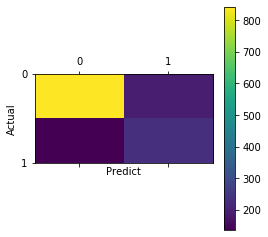

In [95]:
# 请在这一代码框内编写在这一节你需要的程序

# 你可以自由的使用任意数量和任意格式的代码框，但请在最终提交的报告中注意报告的整洁与通顺
maxtrix = confusion_matrix(y_test, y_preds,labels=[0,1])
plt.matshow(maxtrix)
plt.colorbar()
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.xticks(np.arange(maxtrix.shape[1]),[0,1])
plt.yticks(np.arange(maxtrix.shape[1]),[0,1])
plt.show()

在项目中，遵循了提出问题-分析问题-建立模型-评价模型的顺序。

首先，在提出问题阶段，讨论了项目的背景，明确定义了要解决的问题，并明确了解决问题的方法和期待结果，以及评价指标。受限于知识储备，仅仅是希望通过逻辑回归建立预测模型。

其次，在分析问题阶段，对数据集的特点进行了探索。研究了数据的统计信息，并通过直方图，散点图，饼状图，柱状图研究了数据之间的关系，初步建立了数据的内在联系。例如，通过对数据的可视化，发现用户的性别并不对用户的流失造成很大的影响，流失的用户往往是月消费高但是订购服务的时间较短，而且月消费的高低和订购的网络服务有关，客户的流失还和合同的长短有关等等。在分析的过程中，遇到了许多困难与问题。其中一部分来自于对python数据处理API的生疏，必须通过仔细查看文档以获得需要的信息；而另一部分则来自于对数据分析理论和技巧的掌握还不是很熟练，例如在对数据进行可视化之前，没有统一的规划，只是盲目而机械化的作图，而没能从数据中发现更多有益的信息。

再其次，在建立模型的阶段，对数据进行了预处理，并通过计算VIFs，识别了解释变量中的共线性，从而选择了对立性较强的解释变量建立模型。之后，对数据进行了拟合。在此基础上，对模型进行了优化，在保持其有效性的基础上使其变得简洁。但是关于如何确定特征选择的阈值，以及如何从业务知识上选择特征，其实并没有得出一个较好的标准。

最后，对模型进行了评价。对于如何模型的评价，除了混淆矩阵，以及准确率，召回率和精确率之外，还有很多种方法，如 ROC 曲线 与 AUC，从阈值选取角度出发来研究学习器泛化性，需要进一步研究。即使是项目中采用的混淆矩阵等评价方法，运用的也不是很熟练，很难判定什么程度的准确率，召回率和精确率才是“可以接受”的。


----------
** 在提交之前， 问一下自己... **

- 你所写的项目报告结构对比于这个模板而言足够清晰了没有？
- 每一个部分（尤其**分析**和**方法**）是否清晰，简洁，明了？有没有存在歧义的术语和用语需要进一步说明的？
- 你的目标读者是不是能够明白你的分析，方法和结果？
- 报告里面是否有语法错误或拼写错误？
- 报告里提到的一些外部资料及来源是不是都正确引述或引用了？
- 代码可读性是否良好？必要的注释是否加上了？
- 代码是否可以顺利运行并重现跟报告相似的结果？